In [1]:
import numpy
import random



#define the class with parameters for the length, density, vmax and prbability of slowing down
class traffic_simulation():
    
    #initialize the class
    def __init__(self, length, density, vmax, prob):
        self.current_state = [-1]*length
        #self.next_state = [-1]*length
        self.alt_state = [-1]*length
        self.length = length
        self.density = density
        self.vmax = vmax
        self.prob = prob
        self.flow = 0
    
    #display the current form
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.current_state))

    #populate the road with cars    
    def initialize(self):
        #create the initial positions of cars
        initial_positions = random.sample(range(self.length), int(self.density*self.length))
        
        for i in initial_positions:
            self.current_state[i] = random.randrange(1,6, 1)
            
    #checking the spaces before the car 
    def reach(self, i):
        distance = 0
        for e in range(1,self.vmax + 1):
            if self.current_state[(i + e)%self.length] == -1:
                distance += 1
            else:
                break
        return distance
    
    #build the accelerator
    def accelerate(self):
        #for every instance
        for i in range(self.length):
            
            dis = self.reach(i)
            
            #if the object is not empty and it's current state is not the maximum speed and the states in it's current reach are just empty
            if self.current_state[i] < self.vmax and self.current_state[i] != -1 and dis > self.current_state[i]:
                    #add one to the velocity
                    self.current_state[i] = (self.current_state[i] + 1)
           
    #building the slow down function
    def slow(self):
        
        #for every car
        for i in range(self.length):
            
            #if it is a moving car
            if self.current_state[i] > 0:
                
                #determine the distance for the car
                dist = self.reach(i)
                if dist < self.current_state[i]:
                    self.current_state[i] = dist 
                
    
    #creating random slow downs
    def random(self):
        #for every spot
        for i in range(self.length):
            
            #set the velocity to the current state
            velocity = self.current_state[i]
            if velocity > 0 and velocity != -1:
                
                
                #if the random number drawn is smaller than the probability to slow
                if random.random() < self.prob:
                    
                    #slow it down by one. 
                    self.current_state[i] = velocity - 1
        
    
    #move all moving cars forward by as much as they were at
    def advance(self):
        
        self.flow = 0
        for i in range(self.length):
            
            v = self.current_state[i]
            
            if v != -1:
                
                self.alt_state[ (i + v)% self.length ] = v
                if v + i >= self.length:
                    self.flow += 1
                    
                
        self.current_state = self.alt_state
        self.alt_state = [-1]*self.length

In [2]:
#run the simulation

trying = traffic_simulation(length = 100, density = 30/100, vmax = 5, prob = 0.5)
trying.initialize()
trying.display()
        
flow_one_density = []
for j in range(100):
    trying.accelerate()
    trying.slow()
    trying.random()
    trying.advance()
    trying.display() 

.....5....242..515...5.....1..4....22..3...5...5......3........5.54.1..1....52.2...4.5....4.1.4...2.
.3......3.00..200..2......5..2....40.1...2...2......5....3......10.1.1...2..00....30.....4.10....3..
.....4...100..00.1...2.....1...2..00...2....3..2.......3....3...0.10..1...1.0.1...00.....0.00......2
.2......300.1.0.1.1.....3...1...1.00......3..1...2........3....3.10.1...2.0.0..1..0.1....0.00.......
....3...00.10.0.0..1......2...2.0.00........2.1.....3........3..10.1..2.0..1.1...2.1..2...100.......
.......30.10.10.0...1.......2.0.0.00.........1..2.......4......20.1..2.1.1..1..2.0..1...2.000.......
.......0.10.100.0....1......0.0.0.00..........1....3.........5.00...20..1..2.1..10...1...1000.......
........100.00.1.1....1......10.0.0.1..........1.......4.....0.00...00...1.0...20.1....2.000.1......
........00.100.0...2....2....0.10.0..1..........1...........5.10.1..00...0.0...00..1...0.000..1.....
........00.00.1.1.....3....3..100.0...1..........1...........10.1..200...0..1..00....2..100

In [3]:
##record the different flows

flow = []
densities = []

#create a main
def main(iterations_sim, boots):
    #for different densities
    for i in range(1,92,1):
        
        
        #probability of slow down is set to 50%.
        trying = traffic_simulation(length = 100, density = i/100, vmax = 5, prob = 0.5)
        densities.append(i/100)
        trying.initialize()
        
        flow_one_density = []
        
        #boot times for the same density
        for j in range(boots):
            
            #timeinterval
            flow_small = 0 
            for r in range(iterations):
                trying.accelerate()
                trying.slow()
                trying.random()
                trying.advance()
                flow_small += trying.flow
                
            flow_one_density.append(flow_small/iterations)
        flow.append(flow_one_density)
    
    return 


#main just takes the number of iterations
iterations = 200

#boots are the number of times each density is run
boots = 100
main(iterations, boots)   

In [4]:
#graph the different densities and their flow.

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 25
averages = [(sum(flow[i]))/boots for i in range(len(flow))]

#print each data point
for xe, ye in zip(densities, flow):
    plt.scatter([xe] * len(ye), ye, marker = '.')
plt.plot(densities,averages)
plt.axvline(x= densities[averages.index(max(averages))], color = "red", ls = "--")
plt.text(densities[averages.index(max(averages))] + 0.001, 0.15, "Maximum flow at density = 0.1")
plt.grid()
plt.xticks([densities[i] for i in range(0, len(densities) -1, 5)])
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
import numpy
import random
import math


#define the class with parameters for the length, density, vmax and prbability of slowing down
class traffic_simulation():
    
    #initialize the class
    def __init__(self, length, density, vmax, prob):
        self.current_state = [-1]*length
        self.second_state = [-1]*length
        self.alt_state = [-1]*length
        self.second_state_alt = [-1]*length
        
        self.length = length
        self.density = density
        self.vmax = vmax
        self.prob = prob
        
        self.flow_1 = 0
        self.flow_2 = 0
    
    #display the current form
    def display(self):
        #comment out whichever lanes are not supposed to be shown
        #print("Lane 1",''.join('.' if x == -1 else str(x) for x in self.current_state))
        print("Lane 2",''.join('.' if x == -1 else str(x) for x in self.second_state))
        
        #prints a line after each iteration. Uncomment when looking at both lanes.
        #print(''.join('_' for x in self.second_state))

    #populate the lanes with cars    
    def initialize(self):
        #create the initial positions of cars
        initial_positions_current = random.sample(range(self.length), int(self.density*self.length))
        initial_positions_second = random.sample(range(self.length), int(self.density*self.length))
        
        for i in initial_positions_current:
            self.current_state[i] = random.randrange(1,6, 1)
        for j in initial_positions_second:
            self.second_state[j] = random.randrange(1,6,1)
            
    #checking the spaces before the car 
    def forward(self, i, lane):
        distance = 0
        for e in range(1,self.vmax + 1):
            if lane[(i + e)%self.length] == -1:
                distance += 1
            else:
                break
        return distance
    
    
    #checking the space in the other lane
    def backward(self, i, lane):
        distance = 0

        #goes all the way to zero to include the position that the car would move to
        for b in range(0 , self.vmax + 1):

            if lane[(i - b)%self.length] == -1:
                distance += 1
            else:
                break
        return distance
    
    #Switching the lanes
    def switch(self):
        
        #create a list that logges with indices to switch
        switches = [False]*self.length
        
        #for every car in the first lane:
        for i in range(self.length):
            
            if self.current_state[i] > -1:
            
                #check if we need to switch lanes
                if self.forward(i, self.current_state) == self.current_state[i] + 1:
                    #no? move on to next element
                    continue
                
                #yes? let's check if we can switch
                else:
                    #look ahead and backward
                    ahead = self.forward(i, self.second_state)
                    back = self.backward(i, self.second_state)

                    #if there is space, adding +1 to the back function as it also looks at the current spot
                    if ahead >= self.current_state[i] + 1 and back == self.vmax + 1:
                        #set switch of index to true
                        switches[i] = True
        
        #for the second lane
        for j in range(self.length):
            
            #for every car in the second lane
            if self.second_state[j] > -1:
            
                #check if we need to switch lanes
                if self.forward(i, self.second_state) == self.second_state[j] + 1:
                    #move on to next car
                    continue
                
                #check if we can switch
                else:
                    
                    #look ahead and backward
                    ahead = self.forward(j, self.current_state)
                    back = self.backward(j, self.current_state)

                    #check if we can switch
                    if ahead >= self.second_state[j] + 1 and back == self.vmax + 1:
                        #update switch list
                        switches[j] = True

              
        
        #switch all the elements from the two lanes where switch is True
        #we can just switch them because the element the car is switching to is empty.
        for s in range(self.length):
            if switches[s]:
                self.current_state[s], self.second_state[s] = self.second_state[s], self.current_state[s]
    
    #build the accelerator
    def move(self):
        
        
        for lane in [self.current_state, self.second_state]:
            #for every instance
            for i in range(self.length):


                dist = self.forward(i, lane)
                velocity = lane[i]

                #if the object is not empty and it's current state is not the maximum speed and the states in it's current reach are just empty
                if velocity < self.vmax and velocity != -1 and dist > velocity:
                        #add one to the velocity
                        lane[i] = (velocity + 1)
                        

                #slow down
                if velocity > 0:

                    if dist < velocity:
                        lane[i] = dist
                        

                
                #random slow down
    
                #update velocity to the new velocity after accelerating or slowing down    
                velocity = lane[i]
                if velocity > 0:

                    #if the random number drawn is smaller than the probability to slow
                    if random.random() < self.prob:

                        #slow it down by one. 
                        lane[i] = velocity - 1
                        
                        
    
    #move all moving cars forward by as much as they were at
    def advance(self):
        
        
        #record the flow for each lane
        self.flow_1 = 0
        self.flow_2 = 0
        
        #update the first lane
        for i in range(self.length):
            
            v = self.current_state[i]
            
            if v != -1:
                
                self.alt_state[ (i + v)% self.length ] = v
                if v + i >= self.length:
                    self.flow_1 += 1
        
        #update the second lane
        for j in range(self.length):
            
            v = self.second_state[j]
            
            if v != -1:
                
                self.second_state_alt[ (j + v)% self.length ] = v
                if v + j >= self.length:
                    self.flow_2 += 1
                    
                
        self.current_state = self.alt_state
        self.alt_state = [-1]*self.length
        
        self.second_state = self.second_state_alt
        self.second_state_alt = [-1]*self.length
        
        

In [14]:
trying = traffic_simulation(length = 100, density = 30/100, vmax = 5, prob = 0.5)
trying.initialize()
trying.display()
        
flow_one_density = []

random.seed(4)

#set the display steps. If =1, every step will be displayed.
disp_step = 1

for j in range(100):
    trying.switch()
    trying.move()
    trying.advance()
    
    #display steps
    if j%disp_step == 0:
        trying.display()

#returns the total number of cars. It should be density*200. 
print((numpy.array(trying.current_state) != -1).sum() + (numpy.array(trying.second_state) != -1).sum())

Lane 2 ..42.4.4.24.5..3...2..2.1....25....314...14..4......4...3.2...............1...1.42.....1..5.4......2
Lane 2 1.0.1.10.0.1..2...3.1.0..1...0....400...30..2....4.....3.1...3.....1....4..1...10..2....1.0......5..
Lane 2 0.0.0.00..1..2...3.1.10...1...1...00.1..00.....3......5.1.1.....3...1....1..1..0.1...2..0.0.......1.
Lane 2 0.0.0.00...1...2..1.100....1...1..00..1.00.........4..0.0...2......3..2...1...2.1..2...20.0.......0.
Lane 2 0.0..10.1....2...20.000......2..1.0.1.0.0.1..........2.1.1.....3........2...2.0...2...3.1..1......0.
Lane 2 .1...00...2.....300.00.1......1.0..10..10...2........0.0..1.......3........3.1.1....2.0...2.1......1
Lane 2 ..1..0.1....2...00.100...2....0..1.00..00......3.....0..1..1.........3.....0.0...2...1.1...1..2....0
Lane 2 1..1..1.1.....2.00.000......3..1..100..0.1.........4.0...1...2......3....4..10.....2.0..1....2......
Lane 2 ..2..2.1..2....10.100.1.......2..2000...1.1.....1..0..1...1....2........4..200.....0.0...1......3...
Lane 2 ....2.1.1....3.00.00.

In [7]:
##record the different flows

flow_first_lane = []
flow_second_lane = []
flow_2lane = []
densities = []

#create a main
def main(iterations_sim, boots):
    #for different densities
    for i in range(1,92,1):
        
        
        #probability of slow down is set to 50%.
        trying = traffic_simulation(length = 100, density = i/100, vmax = 5, prob = 0.5)
        densities.append(i/100)
        trying.initialize()
        
        flow_one_density_2lane = []
        flow_one_first_lane = []
        flow_one_second_lane = []
        
        #boot times for the same density
        for j in range(boots):
            

            
            flow_small_1 = 0
            flow_small_2 = 0
            flow_small_2lane = 0 
            
            #run the actual simulation
            for r in range(iterations):
                trying.switch()
                trying.move()
                trying.advance()
                
                #record the flow after each run
                flow_small_1 += trying.flow_1
                flow_small_2 += trying.flow_2
                flow_small_2lane += (trying.flow_1 + trying.flow_2)/2
            
            #record the data points for each density
            flow_one_first_lane.append(flow_small_1/iterations)
            flow_one_second_lane.append(flow_small_2/iterations)
            flow_one_density_2lane.append(flow_small_2lane/iterations)
        
        #compile for all densities
        flow_2lane.append(flow_one_density_2lane)
        flow_first_lane.append(flow_one_first_lane)
        flow_second_lane.append(flow_one_second_lane)
    
    return 


#main just takes the number of iterations
iterations = 200

#boots are the number of times each density is run
boots = 100
main(iterations, boots)   

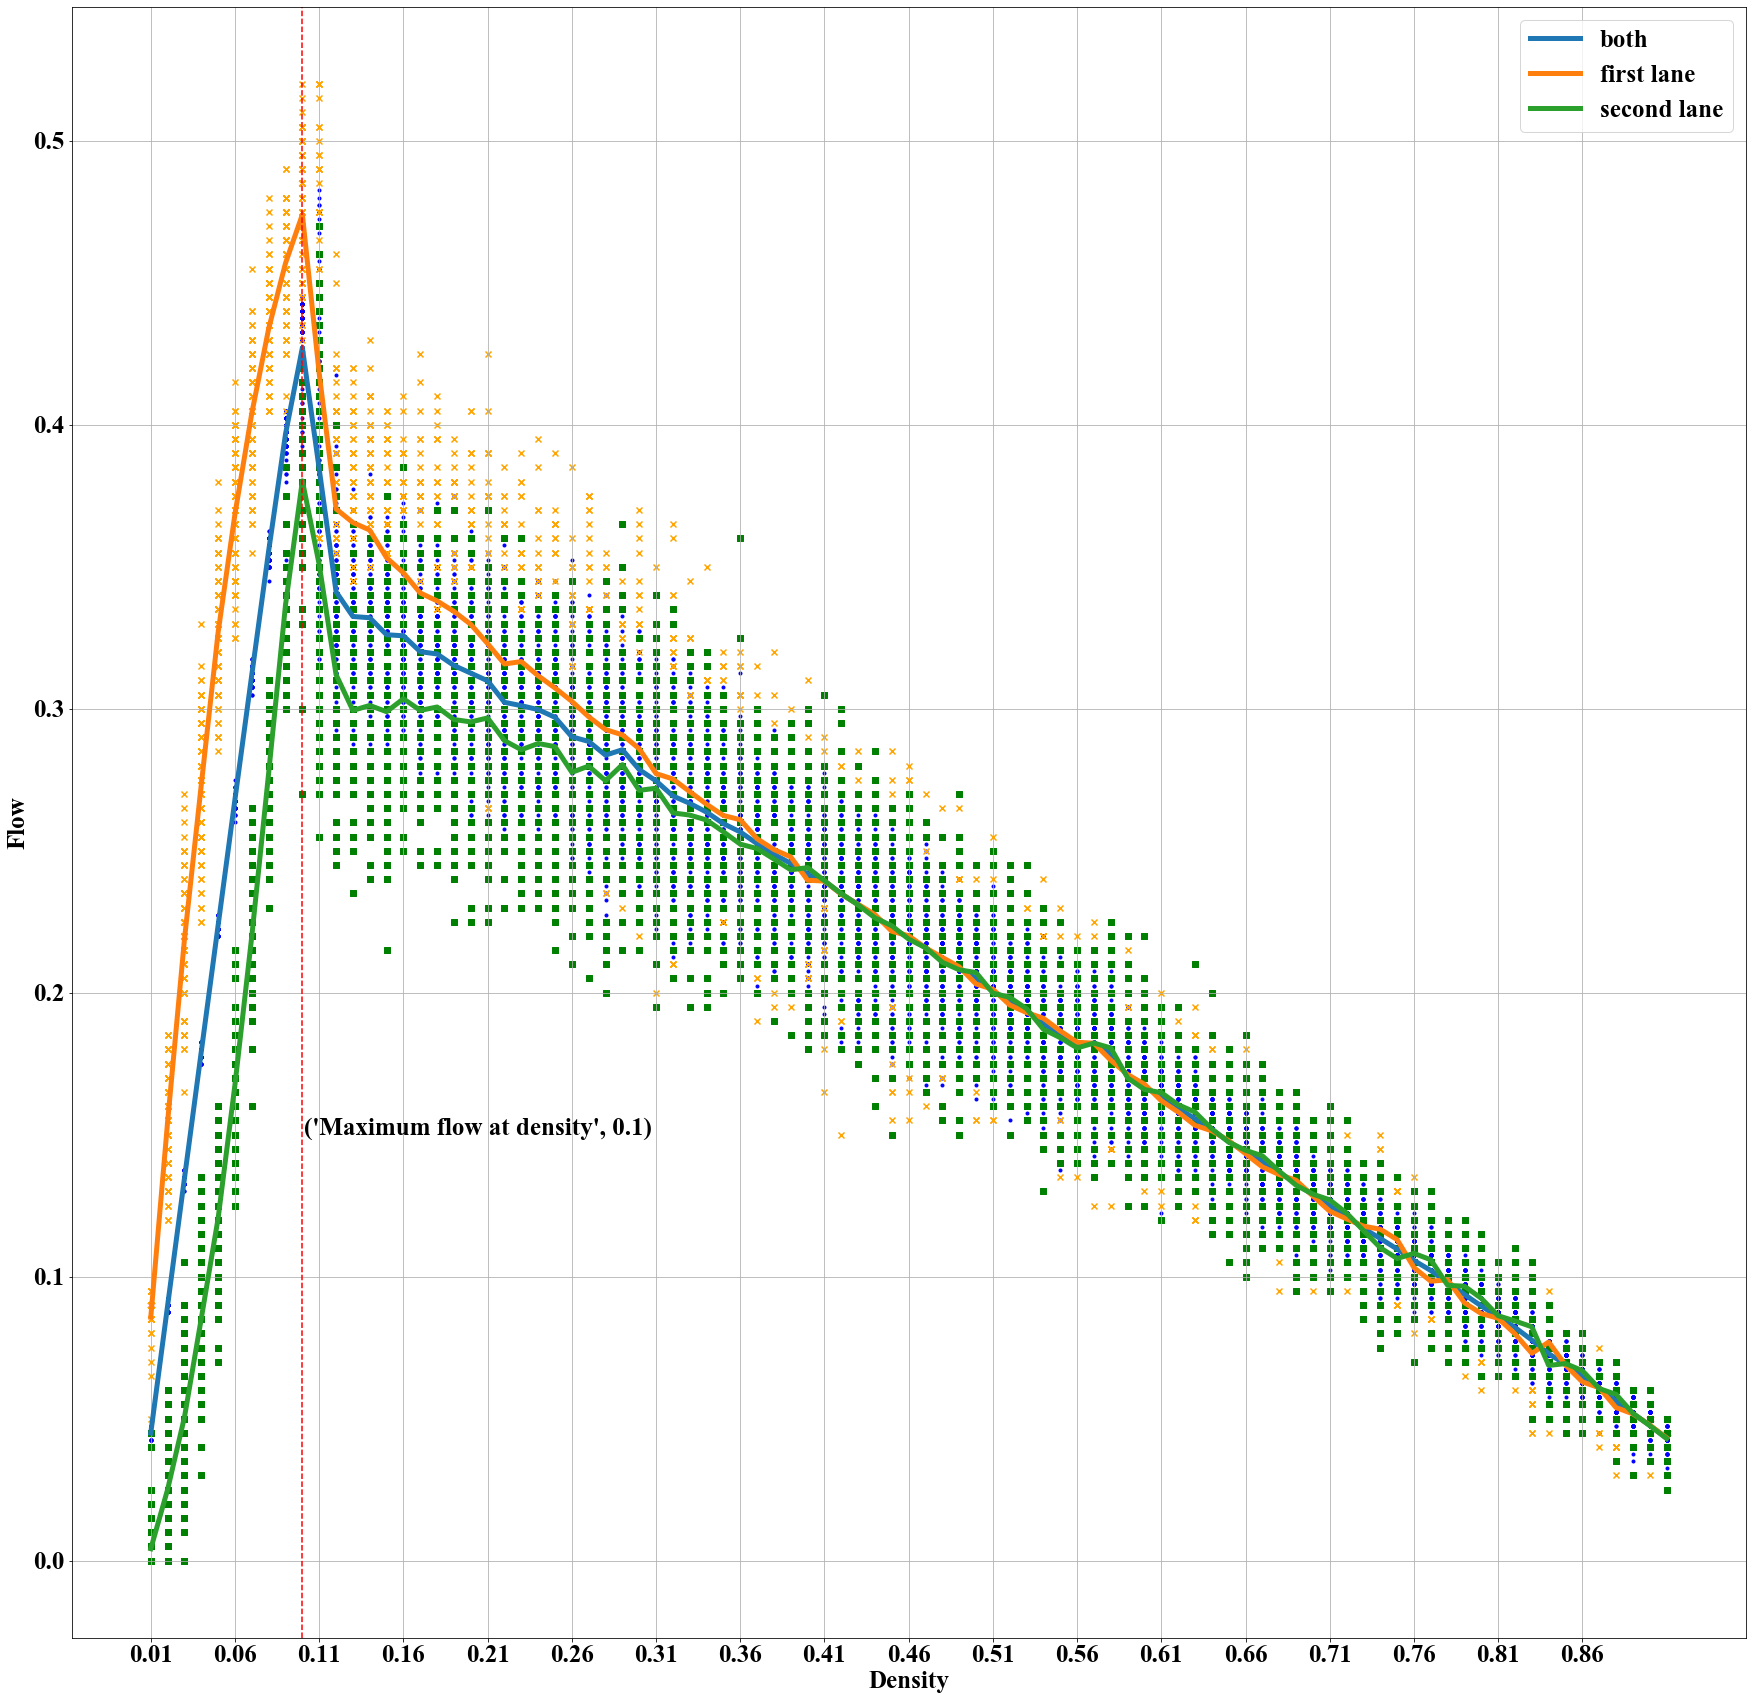

In [16]:
#graph the different densities and their flow.

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 25

#calculate the average flow rate per density per lane
averages_2lane = [(sum(flow_2lane[i]))/boots for i in range(len(flow_2lane))]
averages_first_lane = [(sum(flow_first_lane[i]))/boots for i in range(len(flow_first_lane))]
averages_second_lane = [(sum(flow_second_lane[i]))/boots for i in range(len(flow_second_lane))]


#plot the data points
for xe, ye in zip(densities, flow_2lane):
    plt.scatter([xe] * len(ye), ye, marker = '.', c = 'blue')

for xe, ye in zip(densities, flow_first_lane):
    plt.scatter([xe] * len(ye), ye, marker = 'x', c = 'orange')

for xe, ye in zip(densities, flow_second_lane):
    plt.scatter([xe] * len(ye), ye, marker = 's', c = 'green')

#plot the average curves
plt.plot(densities,averages_2lane, lw = 5)
plt.plot(densities,averages_first_lane, lw = 5)
plt.plot(densities,averages_second_lane, lw = 5)

plt.legend(("both","first lane","second lane"))

plt.axvline(x= densities[averages_2lane.index(max(averages_2lane))], color = "red", ls = "--")
plt.text(densities[averages_2lane.index(max(averages_2lane))] + 0.001, 0.15, ("Maximum flow at density", densities[averages_2lane.index(max(averages_2lane))]))
plt.grid()
plt.xlabel("Density")
plt.ylabel("Flow")
plt.xticks([densities[i] for i in range(0, len(densities) -1, 5)])
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

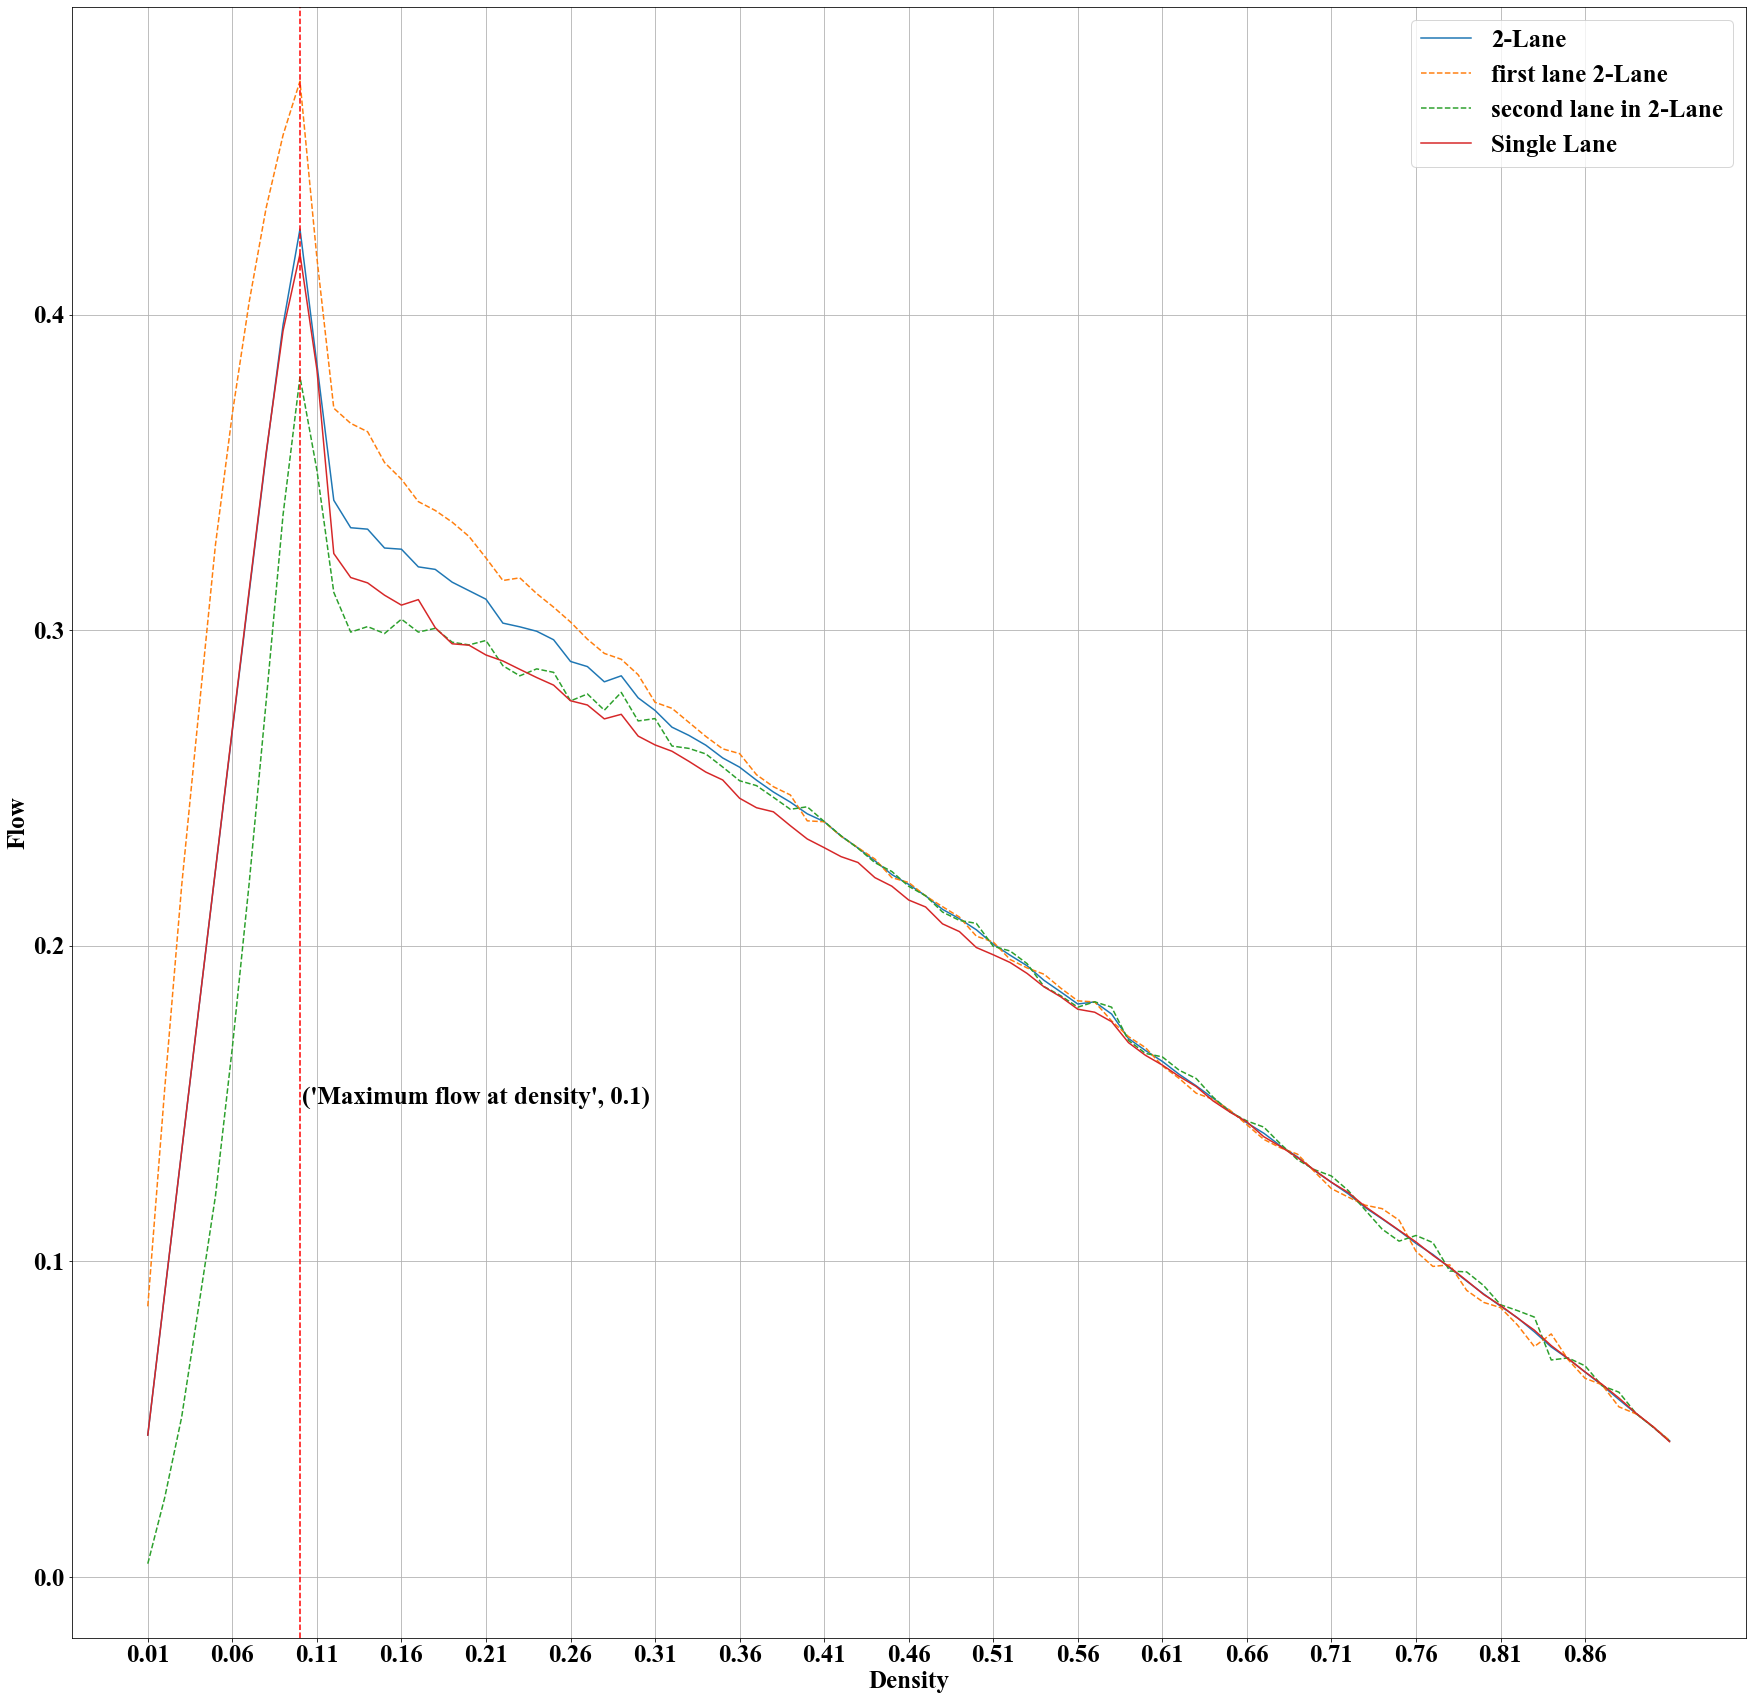

In [9]:
#graph the different densities and their flow.

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 25

#plot all the average curves
plt.plot(densities,averages_2lane)
plt.plot(densities,averages_first_lane, ls = '--')
plt.plot(densities,averages_second_lane, ls = '--')
plt.plot(densities,averages)

plt.axvline(x= densities[averages_2lane.index(max(averages_2lane))], color = "red", ls = "--")
plt.text(densities[averages_2lane.index(max(averages_2lane))] + 0.001, 0.15, ("Maximum flow at density", densities[averages_2lane.index(max(averages_2lane))]))
plt.grid()

plt.xlabel("Density")
plt.ylabel("Flow")

plt.xticks([densities[i] for i in range(0, len(densities) -1, 5)])
plt.rcParams["figure.figsize"] = (30,30)
plt.legend(("2-Lane", "first lane 2-Lane", "second lane in 2-Lane","Single Lane"))
plt.show()

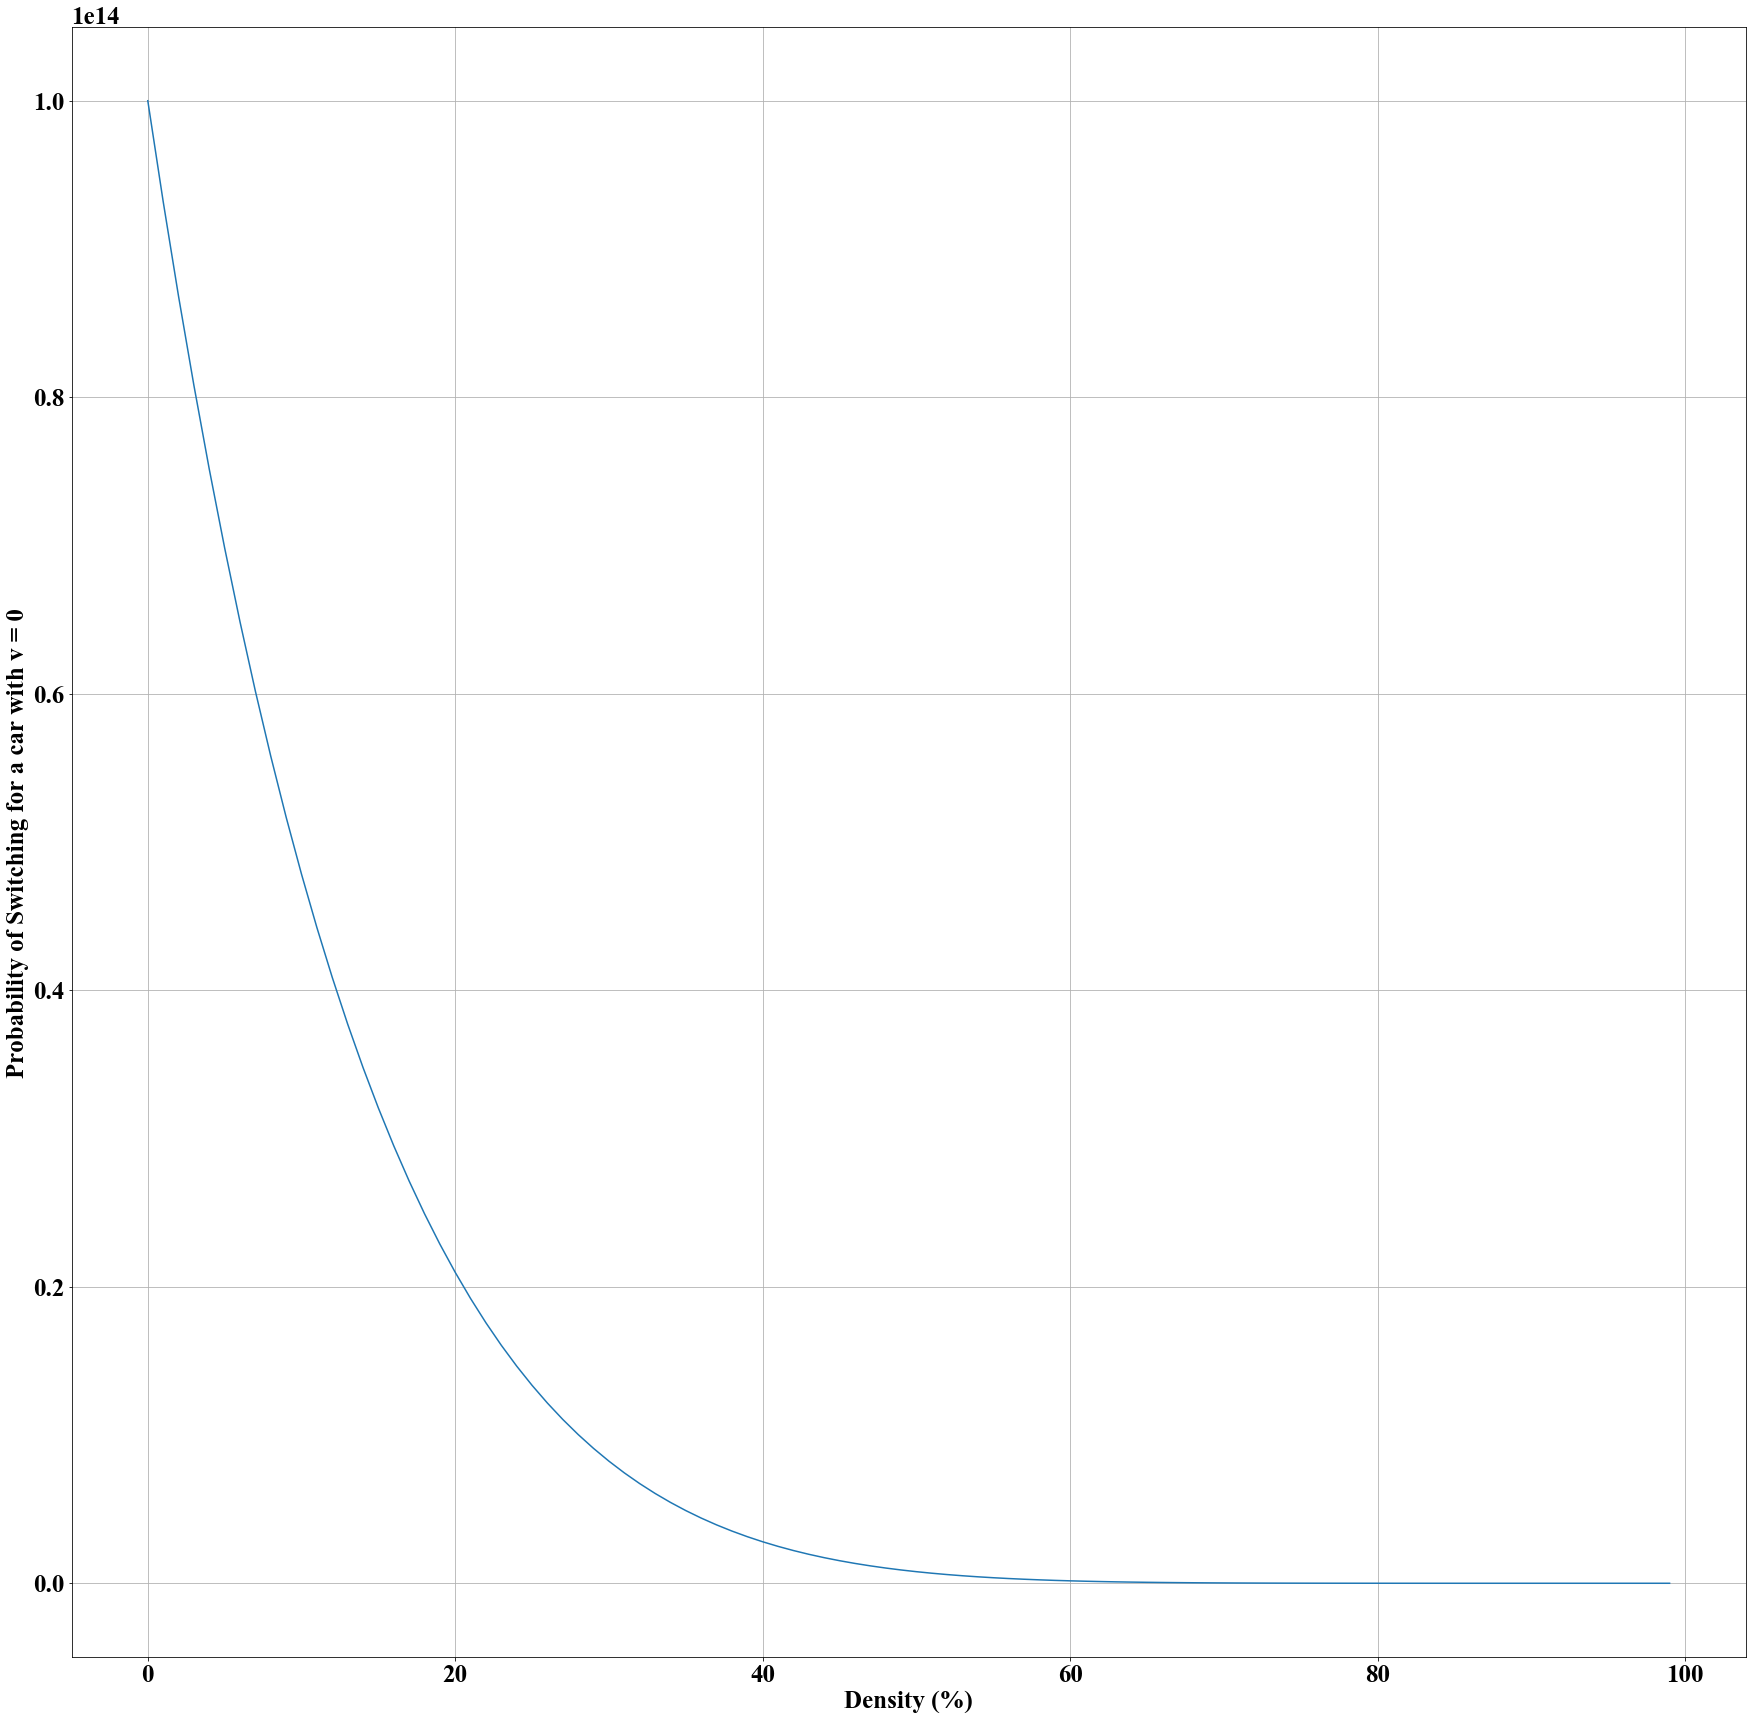

In [10]:
#Plot figure of prob of switching
plt.plot([x for x in range(0,100,1)],[(100-x)**7 for x in range(0,100,1)])
plt.xlabel("Density (%)")
plt.ylabel("Probability of Switching for a car with v = 0")
plt.grid()